# Etude des gain de golds 

on va voire pour trouver le points de rupture victoire/defaite des equipes lors de matchs.

est ce que quand une equipe arrive a un certain gold elle est "obliger" de gagner

In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

#Data need: golds

path_gold = "../../Data/DataRaw/set_gold.csv"
path_date = "../../Data/DataRework/set_addressDate.csv"
path_info = "../../Data/DataRaw/set_matchInfo.csv"


df_gold = pd.read_csv(path_gold)
df_date = pd.read_csv(path_date)
df_info = pd.read_csv(path_info)

#Add date to structure
df_gold = df_gold.merge(right=df_date, right_on="Address", left_on="Address", how="left")
df_gold = df_gold.merge(right=df_info[['rResult','Address']], right_on="Address",left_on="Address",how="left")

# Set the datetime columns
df_gold.Date = pd.to_datetime(df_gold.Date)



In [2]:
df_gold.columns

Index(['Address', 'Type', 'min_1', 'min_2', 'min_3', 'min_4', 'min_5', 'min_6',
       'min_7', 'min_8', 'min_9', 'min_10', 'min_11', 'min_12', 'min_13',
       'min_14', 'min_15', 'min_16', 'min_17', 'min_18', 'min_19', 'min_20',
       'min_21', 'min_22', 'min_23', 'min_24', 'min_25', 'min_26', 'min_27',
       'min_28', 'min_29', 'min_30', 'min_31', 'min_32', 'min_33', 'min_34',
       'min_35', 'min_36', 'min_37', 'min_38', 'min_39', 'min_40', 'min_41',
       'min_42', 'min_43', 'min_44', 'min_45', 'min_46', 'min_47', 'min_48',
       'min_49', 'min_50', 'min_51', 'min_52', 'min_53', 'min_54', 'min_55',
       'min_56', 'min_57', 'min_58', 'min_59', 'min_60', 'min_61', 'min_62',
       'min_63', 'min_64', 'min_65', 'min_66', 'min_67', 'min_68', 'min_69',
       'min_70', 'min_71', 'min_72', 'min_73', 'min_74', 'min_75', 'min_76',
       'min_77', 'min_78', 'min_79', 'min_80', 'min_81', 'min_82', 'min_83',
       'min_84', 'min_85', 'min_86', 'min_87', 'min_88', 'min_89', 'min_90',

In [3]:

df_gold = df_gold[['Address','Date', 'Type','rResult', 'min_1', 'min_2', 'min_3', 'min_4', 'min_5', 'min_6',
       'min_7', 'min_8', 'min_9', 'min_10', 'min_11', 'min_12', 'min_13',
       'min_14', 'min_15', 'min_16', 'min_17', 'min_18', 'min_19', 'min_20',
       'min_21', 'min_22', 'min_23', 'min_24', 'min_25', 'min_26', 'min_27',
       'min_28', 'min_29', 'min_30', 'min_31', 'min_32', 'min_33', 'min_34',
       'min_35', 'min_36', 'min_37', 'min_38', 'min_39', 'min_40', 'min_41',
       'min_42', 'min_43', 'min_44', 'min_45', 'min_46', 'min_47', 'min_48',
       'min_49', 'min_50', 'min_51', 'min_52', 'min_53', 'min_54', 'min_55']]


In [4]:
df_gold.head()

,Address,Date,Type,rResult,min_1,min_2,min_3,min_4,min_5,min_6,...,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55
0,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,golddiff,0,0,0,-14,-65,-268,-431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,golddiff,1,0,0,-26,-18,147,237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,golddiff,0,0,0,10,-60,34,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,golddiff,1,0,0,-15,25,228,-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,golddiff,0,40,40,44,-36,113,158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tt = pd.DataFrame({"Address":[],"Date":[],"Type":[],"VictoireRouge":[],"Gold":[]})
i=0

while i< len(df_gold):
    j = 1
    g = []
    row = df_gold.iloc[i]
    while j < 56:
        g.append(row["min_" + str(j)])
        j+=1
    a = {"Address":row["Address"],"Date":row["Date"],"Type":row["Type"],"VictoireRouge":row["rResult"],"Gold":g}
    
    tt = tt.append(a, ignore_index=True)
    i+=1
    
    

In [6]:
tt

,Address,Date,Type,VictoireRouge,Gold
0,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,golddiff,0.0,"[0, 0, -14, -65, -268, -431, -488, -789, -494,..."
1,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,golddiff,1.0,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,..."
2,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,golddiff,0.0,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ..."
3,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,golddiff,1.0,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ..."
4,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,golddiff,0.0,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20..."
...,...,...,...,...,...
99055,https://matchhistory.euw.leagueoflegends.com/e...,2018-01-28,goldredSupport,1.0,"[500, 500, 566, 801, 1004, 1234, 1463, 1674, 1..."
99056,https://matchhistory.euw.leagueoflegends.com/e...,2018-01-28,goldredSupport,1.0,"[500, 500, 587, 790, 1107, 1335, 1472, 1616, 1..."
99057,https://matchhistory.na.leagueoflegends.com/en...,2018-01-28,goldredSupport,1.0,"[500, 500, 585, 770, 976, 1222, 1446, 1627, 19..."
99058,https://matchhistory.na.leagueoflegends.com/en...,2018-01-28,goldredSupport,0.0,"[500, 500, 592, 788, 1006, 1251, 1490, 1704, 1..."


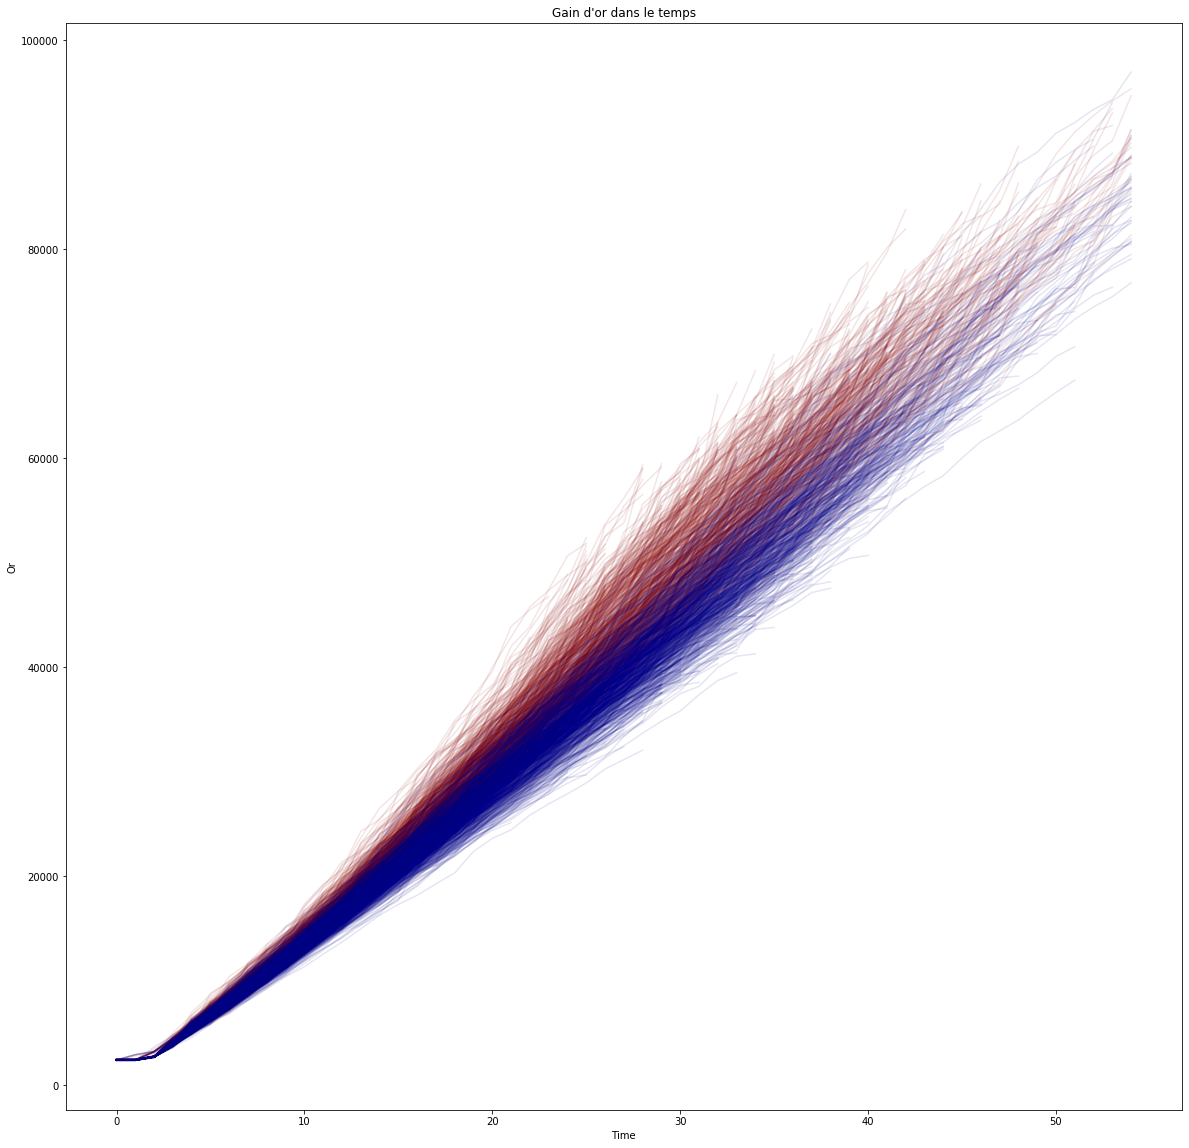

In [7]:
plt.figure(figsize=(20,20))
for i, row in tt[(tt.Type == "goldred")&(tt.Date.dt.year == 2015)&(tt.VictoireRouge == 1)].iterrows():
    plt.plot(row["Gold"], color="DarkRed",alpha=0.1)
    
for i, row in tt[(tt.Type == "goldred")&(tt.Date.dt.year == 2015)&(tt.VictoireRouge == 0)].iterrows():
    plt.plot(row["Gold"], color="DarkBlue",alpha=0.1)
    
plt.xlabel("Time")
plt.ylabel("Or")
plt.title("Gain d'or dans le temps")
plt.show()
 

In [8]:

df_gold_victoire = tt[(tt.VictoireRouge == 1) & (tt.Type == "goldred") | (tt.VictoireRouge == 0) & (tt.Type == "goldblue")].copy()
df_gold_defaite = tt[(tt.VictoireRouge == 0) & (tt.Type == "goldred") | (tt.VictoireRouge == 1) & (tt.Type == "goldblue")].copy()


In [9]:

tt.loc[tt[(tt.VictoireRouge == 0) & (tt.Type == "goldred") | (tt.VictoireRouge == 1) & (tt.Type == "goldblue")].index,'VictoireRouge'] = "Defaite"
tt.loc[tt[(tt.VictoireRouge == 1) & (tt.Type == "goldred") | (tt.VictoireRouge == 0) & (tt.Type == "goldblue")].index,'VictoireRouge'] = "Victoire"


In [10]:
df_gold_gra = tt[(tt.Type == "goldred") | (tt.Type == "goldblue")].copy()
df_gold_gra

,Address,Date,Type,VictoireRouge,Gold
7620,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,goldblue,Victoire,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866..."
7621,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,goldblue,Defaite,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895..."
7622,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Victoire,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965..."
7623,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Defaite,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930..."
7624,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Victoire,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913..."
...,...,...,...,...,...
22855,https://matchhistory.euw.leagueoflegends.com/e...,2018-01-28,goldred,Victoire,"[2500, 2500, 2981, 4452, 6050, 7662, 9129, 104..."
22856,https://matchhistory.euw.leagueoflegends.com/e...,2018-01-28,goldred,Victoire,"[2500, 2500, 3022, 4791, 6645, 8323, 9524, 110..."
22857,https://matchhistory.na.leagueoflegends.com/en...,2018-01-28,goldred,Victoire,"[2500, 2508, 2997, 4413, 5901, 7665, 9217, 112..."
22858,https://matchhistory.na.leagueoflegends.com/en...,2018-01-28,goldred,Defaite,"[2500, 2500, 3071, 4596, 6054, 7806, 9281, 109..."


In [11]:
df_gold_victoire = df_gold_gra[df_gold_gra.VictoireRouge == "Victoire"]
df_gold_defaite = df_gold_gra[df_gold_gra.VictoireRouge == "Defaite"]

In [12]:
#x = np.arange(1,56)
# Plot the responses for different events and regions
#sns.lineplot(df_gold_gra.Gold)

In [13]:
df_gold_defaite.head()

,Address,Date,Type,VictoireRouge,Gold
7621,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,goldblue,Defaite,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895..."
7623,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Defaite,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930..."
7625,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Defaite,"[2415, 2415, 2725, 3863, 5244, 6585, 7683, 903..."
7628,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-26,goldblue,Defaite,"[2415, 2415, 2721, 3938, 5363, 6694, 8144, 943..."
7633,http://matchhistory.na.leagueoflegends.com/en/...,2015-02-01,goldblue,Defaite,"[2415, 2415, 2716, 3798, 5393, 6399, 7642, 880..."


In [14]:
df_gold_victoire.head()

,Address,Date,Type,VictoireRouge,Gold
7620,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-24,goldblue,Victoire,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866..."
7622,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Victoire,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965..."
7624,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Victoire,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913..."
7626,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Victoire,"[2415, 2433, 2734, 4031, 5258, 6651, 7855, 909..."
7627,http://matchhistory.na.leagueoflegends.com/en/...,2015-01-25,goldblue,Victoire,"[2415, 2415, 2731, 3921, 5089, 6674, 7693, 891..."


In [15]:
#Or moyen victoire
liste_gold_victoire = pd.DataFrame({"Time":np.arange(1,56),"gold":0})
j = 0

while j < 55:
    
    sum_temp_t = 0
    compteur = 0
    for i,r in df_gold_victoire.iterrows():
                
                
        aaj = r['Gold'][j]
        
        if not np.isnan(aaj):
            
            sum_temp_t += aaj
            compteur +=1
            
    nb_moyen = sum_temp_t/compteur
    liste_gold_victoire.iloc[j]['gold'] = nb_moyen        
    j+=1



In [16]:
#Or moyen defaite

liste_gold_defaite = pd.DataFrame({"Time":np.arange(1,56),"gold":0})
j = 0

while j < 55:
    
    sum_temp_t = 0
    compteur = 0
    for i,r in df_gold_defaite.iterrows():
                
                
        aaj = r['Gold'][j]
        
        if not np.isnan(aaj):
            
            sum_temp_t += aaj
            compteur +=1
            
    nb_moyen = sum_temp_t/compteur
    liste_gold_defaite.iloc[j]['gold'] = nb_moyen        
    j+=1


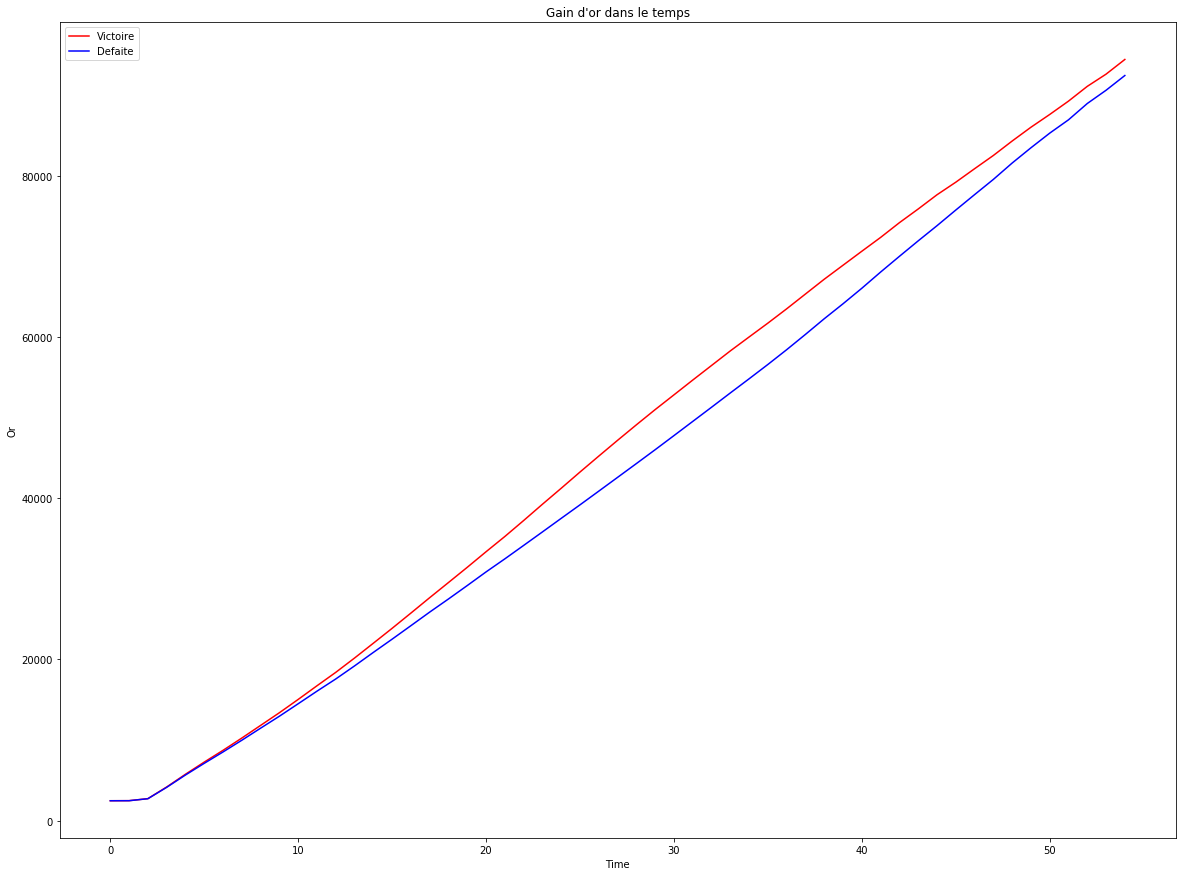

In [17]:
plt.figure(figsize=(20,15))

plt.plot(liste_gold_victoire.gold, color="Red", label="Victoire")
plt.plot(liste_gold_defaite.gold, color="Blue", label="Defaite")
    
plt.xlabel("Time")
plt.ylabel("Or")
plt.title("Gain d'or dans le temps")
plt.legend()
plt.show()
 

In [18]:
liste_gold_victoire.head(15)


,Time,gold
0,1,2482
1,2,2490
2,3,2742
3,4,4185
4,5,5767
5,6,7276
6,7,8735
7,8,10257
8,9,11826
9,10,13397


In [19]:
liste_gold_defaite.head(15)

,Time,gold
0,1,2482
1,2,2487
2,3,2732
3,4,4143
4,5,5673
5,6,7122
6,7,8532
7,8,9985
8,9,11482
9,10,12964


In [20]:
test = pd.DataFrame()

In [21]:
test["Time"] = liste_gold_victoire.Time
test["Victoire"] = liste_gold_victoire.gold
test["Defaite"] = liste_gold_defaite.gold
test["Diference"] = liste_gold_victoire.gold - liste_gold_defaite.gold

In [22]:
test

,Time,Victoire,Defaite,Diference
0,1,2482,2482,0
1,2,2490,2487,3
2,3,2742,2732,10
3,4,4185,4143,42
4,5,5767,5673,94
5,6,7276,7122,154
6,7,8735,8532,203
7,8,10257,9985,272
8,9,11826,11482,344
9,10,13397,12964,433


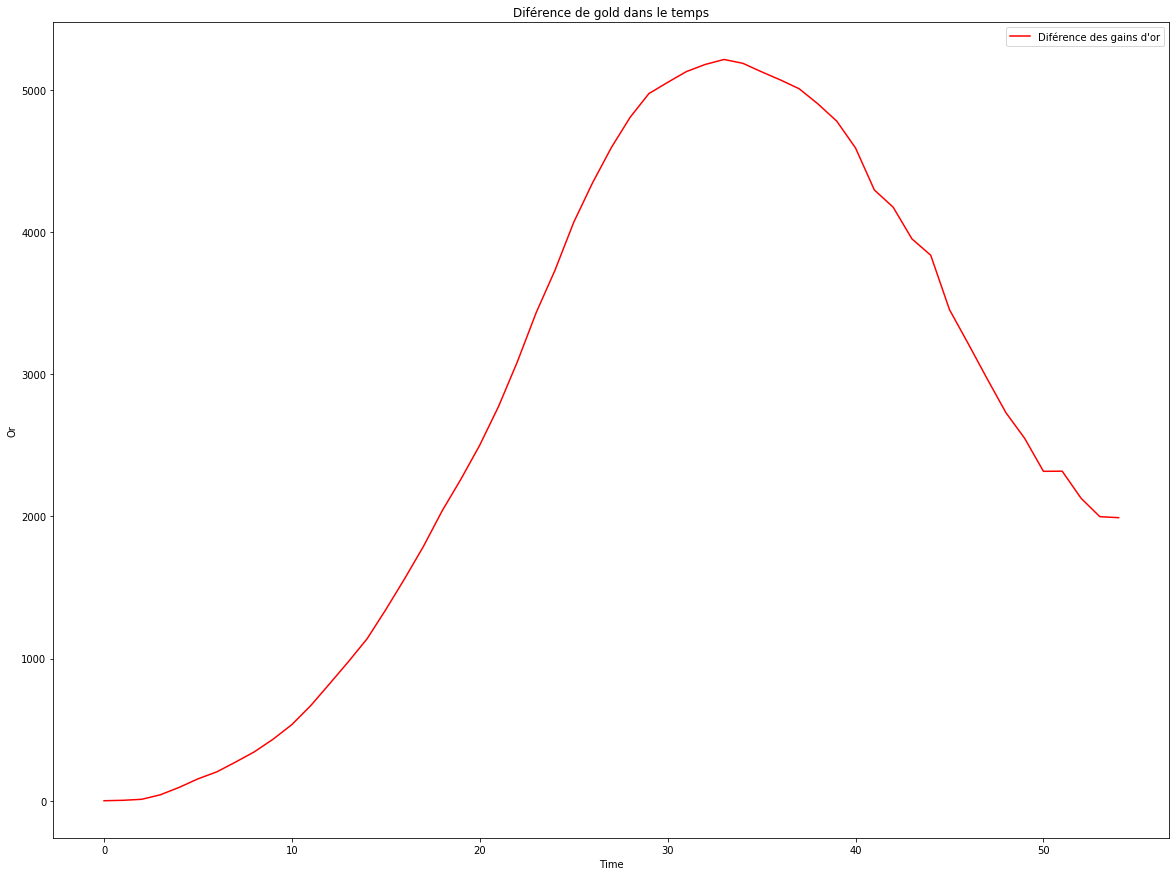

In [23]:
plt.figure(figsize=(20,15))

plt.plot(test.Diference, color="Red", label="Diférence des gains d'or")
    
plt.xlabel("Time")
plt.ylabel("Or")
plt.title("Diférence de gold dans le temps")
plt.legend()
plt.show()
 

In [27]:
test["total"] = test["Victoire"] + test["Defaite"]

In [34]:
test["%Victoire"] = (test["Victoire"]*100 )/ test["total"]

In [37]:
test["%Defaite"] = (test["Defaite"]*100 )/ test["total"]

In [38]:
test["%Ecart"] = (test["Diference"]*100 )/ test["total"]

In [39]:
test

,Time,Victoire,Defaite,Diference,total,%Victoire,%Defaite,%Ecart
0,1,2482,2482,0,4964,50.000000,50.000000,0.000000
1,2,2490,2487,3,4977,50.030139,49.969861,0.060277
2,3,2742,2732,10,5474,50.091341,49.908659,0.182682
3,4,4185,4143,42,8328,50.252161,49.747839,0.504323
4,5,5767,5673,94,11440,50.410839,49.589161,0.821678
5,6,7276,7122,154,14398,50.534796,49.465204,1.069593
6,7,8735,8532,203,17267,50.587826,49.412174,1.175653
7,8,10257,9985,272,20242,50.671870,49.328130,1.343741
8,9,11826,11482,344,23308,50.737944,49.262056,1.475888
9,10,13397,12964,433,26361,50.821289,49.178711,1.642578


In [40]:
a = test["Victoire"].sum()
b = test["Defaite"].sum()
c = test["total"].sum()


d = (a*100 )/ c
e = (b*100 )/ c

In [41]:
d

51.50539380489282

In [42]:
e

48.49460619510718